In [123]:
data("iris")
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [124]:
dataset<-iris[which(iris$Species!="versicolor"),][1:2-3]
head(dataset)

Petal.Length,Petal.Width,Species
1.4,0.2,setosa
1.4,0.2,setosa
1.3,0.2,setosa
1.5,0.2,setosa
1.4,0.2,setosa
1.7,0.4,setosa


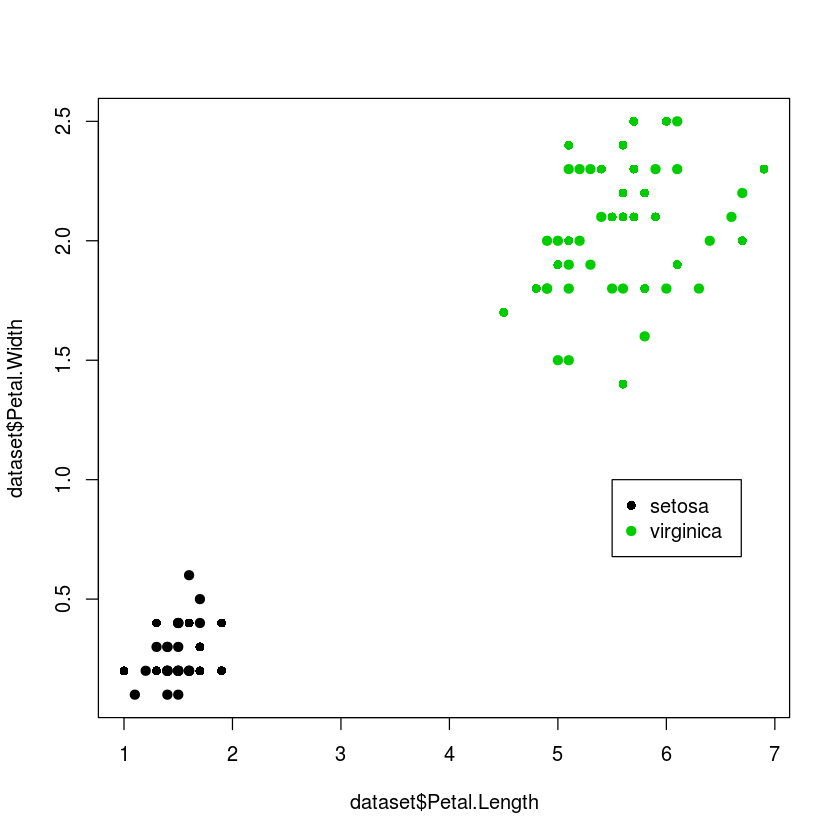

In [125]:
plot(dataset$Petal.Length,dataset$Petal.Width,pch=c(16,19),col=dataset$Species)
legend(5.5,1,legend=c("setosa","virginica"),col=c(1,3),pch=c(16,19))

In [4]:
library("plyr")
classes<-as.numeric(dataset$Species)
classes_bin<-mapvalues(classes,from=c(1,3),to=c(0,1))
print((classes_bin))

  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [34]:
x1<-dataset[,1]/max(dataset[,1])
x2<-dataset[,2]/max(dataset[,2])
X <- cbind (x1, x2, 1)
Y <- classes_bin

## Criar rede neral 

In [82]:
neural <- function (X, Y){

    W<-c(0,0,1)
    eta<-0.1
    epoca_max<-20
    erro_ite<-rep(0,dim(X)[1])
    erro_total <- vector()
    for(epoca in 1:epoca_max){
     for(i in 1:dim(X)[1]) {
     v<-sum(X[i,]*W)
     if(v>0){
     y_calc<-1
     }else{
     y_calc<-0
     }
     erro<-Y[i]-y_calc
     delta<-(eta*erro*X[i,])
     W<-W+delta
     erro_ite[i]<-erro^2
     }
     erro_total[epoca]<-sum(erro_ite)
     if(sum(erro_total[epoca])==0){
         return (W)
     }
    }
}

## Função de Erro

In [147]:
erro_teste <- function(X, Y, W) {
    erro_total <- 0
    for(i in 1:dim(X)[1]) {
         v<-sum(X[i,]*W)
         if(v>0){
         y_calc<-1
         }else{
         y_calc<-0
         }
         erro<-Y[i]-y_calc
         erro_total <- erro_total + erro^2
    }
    return (erro_total)
}

## Função de Acurácia 

In [162]:
acuracia <- function (X, Y, W){
    acertos = 0
    erros = 0
    for(i in 1:dim(X)[1]) {
         v<-sum(X[i,]*W)
         if(v>0){
         y_calc<-1
         }else{
         y_calc<-0
         }
         acertos <- if (y_calc == Y[i]) acertos + 1
    }
    return (acertos/length(Y))
}

## Função para fazer K amostragens aleatórias

In [193]:
Ws <- c()
erros <- c()
acuracias <- c()
ktestes <- function (X, Y, k){
    for (i in 1:k){
        n <- nrow(X)
        s = sample(n)
        shuffled_X <- X[s, ]
        shuffled_Y <- Y[s]
        train_X <- shuffled_X[1:round(0.8 * n), ]
        train_Y <- shuffled_Y[1:round(0.8 * n)]
        test_X <- shuffled_X[(round(0.8 * n) + 1):n, ]
        test_Y <- shuffled_Y[(round(0.8 * n) + 1):n]
        W = neural (train_X, train_Y)
        Ws <- c(Ws, W)
        erros <- c (erros, erro_teste (X, Y, W))
        acuracias <- c(acuracias, acuracia (X, Y, W))
    }
    return (list(erros, acuracias))
}

## Rodar 20 vezes e mostrar o erro e a acurácia dos testes

In [209]:
k <- 20
resultados <- ktestes (X, Y, k)
cat ("Erros dos ", k, " testes:")
print(resultados[1])
cat ("Acurácia dos ", k, " testes:")
print(resultados[2])

Erros dos  20  testes:[[1]]
 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Acurácia dos  20  testes:[[1]]
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

